In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [15]:
df = pd.read_csv('../output_bins/country_conditioned_results_micro.csv')
df

,Unnamed: 0,model,bin,type,accuracy,precision,recall,f1
0,0,7b_sft,African-Islamic,rot_conditioned,0.317322,0.317322,0.317322,0.317322
1,1,7b_sft,Orthodox Europe,rot_conditioned,0.320158,0.320158,0.320158,0.320158
2,2,7b_sft,Confucian,rot_conditioned,0.309091,0.309091,0.309091,0.309091
3,3,7b_sft,Catholic Europe,rot_conditioned,0.337302,0.337302,0.337302,0.337302
4,4,7b_sft,Protestant Europe,rot_conditioned,0.299320,0.299320,0.299320,0.299320
...,...,...,...,...,...,...,...,...
155,155,gpt4,Catholic Europe,rot_conditioned,0.888889,0.888889,0.888889,0.888889
156,156,gpt4,Protestant Europe,rot_conditioned,0.884354,0.884354,0.884354,0.884354
157,157,gpt4,English Speaking,rot_conditioned,0.885167,0.885167,0.885167,0.885167
158,158,gpt4,Latin America,rot_conditioned,0.883333,0.883333,0.883333,0.883333


In [16]:
models = ['30b_sft', '30b_sft_kto', 'llama2-7b-chat', 'llama2-70b-chat', 'mistral-chat', 'gpt4']


In [17]:
subset_df = df[df['model'].isin(models)].reset_index()


subset_df = subset_df[subset_df['bin'].isin(['African-Islamic', 'English Speaking'])].reset_index()

subset_df


,level_0,index,Unnamed: 0,model,bin,type,accuracy,precision,recall,f1
0,0,64,64,30b_sft,African-Islamic,rot_conditioned,0.385735,0.385735,0.385735,0.385735
1,5,69,69,30b_sft,English Speaking,rot_conditioned,0.363636,0.363636,0.363636,0.363636
2,8,88,88,30b_sft_kto,African-Islamic,rot_conditioned,0.618632,0.618632,0.618632,0.618632
3,13,93,93,30b_sft_kto,English Speaking,rot_conditioned,0.665072,0.665072,0.665072,0.665072
4,16,96,96,llama2-7b-chat,African-Islamic,rot_conditioned,0.446870,0.446870,0.446870,0.446870
5,21,101,101,llama2-7b-chat,English Speaking,rot_conditioned,0.531100,0.531100,0.531100,0.531100
6,24,112,112,llama2-70b-chat,African-Islamic,rot_conditioned,0.705968,0.705968,0.705968,0.705968
7,29,117,117,llama2-70b-chat,English Speaking,rot_conditioned,0.746411,0.746411,0.746411,0.746411
8,32,136,136,mistral-chat,African-Islamic,rot_conditioned,0.800582,0.800582,0.800582,0.800582
9,37,141,141,mistral-chat,English Speaking,rot_conditioned,0.846890,0.846890,0.846890,0.846890


In [18]:
from matplotlib.colors import to_rgba, to_hex
base_colors = {
    '30b': '#ff3300',    # Red
    'llama2': '#FFA500',     # Orange
    'olmo': '#008000',       # Dark green
    'mistral': '#008080',    # Teal
    'gpt': '#800049'         # Purple
}

def adjust_color_lightness(color, amount=0.5):
    """
    Adjusts a color's brightness.
    amount > 1.0 makes the color lighter, amount < 1.0 makes it darker.
    """
    try:
        c = to_rgba(color)
        c = (c[0] * amount, c[1] * amount, c[2] * amount, c[3])
        return to_hex(c)
    except Exception as e:
        print(f"Error adjusting color brightness: {e}")
        return color

def get_model_base(name):
    """
    Extracts the base model name and adjusts for variations if necessary.
    """
    if '30b' in name:
        return '30b'
    elif 'llama2' in name:
        return 'llama2'
    elif 'mistral' in name:
        return 'mistral'
    elif 'gpt' in name:
        return 'gpt'
    else:
        return None

# Assign colors to each model, adjusting for specific variations
subset_df['color'] = subset_df['model'].apply(lambda x: adjust_color_lightness(base_colors[get_model_base(x)], 
                                                                               0.8 if 'kto' in x or '70b-chat' in x else 1.0))
        

african_islamic_data = subset_df[subset_df['bin'] == 'African-Islamic']
english_speaking_data = subset_df[subset_df['bin'] == 'English Speaking']

african_islamic_data['model'] = pd.Categorical(african_islamic_data['model'], categories=models, ordered=True)
african_islamic_data = african_islamic_data.sort_values('model')

english_speaking_data['model'] = pd.Categorical(english_speaking_data['model'], categories=models, ordered=True)
english_speaking_data = english_speaking_data.sort_values('model')

/tmp/ipykernel_2880828/2814210007.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  african_islamic_data['model'] = pd.Categorical(african_islamic_data['model'], categories=models, ordered=True)
/tmp/ipykernel_2880828/2814210007.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_speaking_data['model'] = pd.Categorical(english_speaking_data['model'], categories=models, ordered=True)


In [19]:
african_islamic_data['model'] = pd.Series(['llama1-30b-sft', 'llama1-30b-kto', 'llama2-7b-chat', 'llama2-70b-chat', 'mistral-instruct', 'GPT-4'], index=[0, 2, 4, 6, 8, 10])

In [20]:
african_islamic_data.index

Index([0, 2, 4, 6, 8, 10], dtype='int64')

In [21]:
english_speaking_data['model'] = pd.Series(['llama1-30b-sft', 'llama1-30b-kto', 'llama2-7b-chat', 'llama2-70b-chat', 'mistral-instruct', 'GPT-4'], index=[1, 3, 5, 7, 9, 11])

In [22]:
english_speaking_data

,level_0,index,Unnamed: 0,model,bin,type,accuracy,precision,recall,f1,color
1,5,69,69,llama1-30b-sft,English Speaking,rot_conditioned,0.363636,0.363636,0.363636,0.363636,#ff3300
3,13,93,93,llama1-30b-kto,English Speaking,rot_conditioned,0.665072,0.665072,0.665072,0.665072,#cc2900
5,21,101,101,llama2-7b-chat,English Speaking,rot_conditioned,0.531100,0.531100,0.531100,0.531100,#ffa500
7,29,117,117,llama2-70b-chat,English Speaking,rot_conditioned,0.746411,0.746411,0.746411,0.746411,#cc8400
9,37,141,141,mistral-instruct,English Speaking,rot_conditioned,0.846890,0.846890,0.846890,0.846890,#008080
11,45,157,157,GPT-4,English Speaking,rot_conditioned,0.885167,0.885167,0.885167,0.885167,#800049


/tmp/ipykernel_2880828/3446292130.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ((x1) / 2) + 0.2, mid_height, round(float(african_islamic_data[african_islamic_data['model'] == 'llama1-30b-kto']['accuracy']) - float(african_islamic_data[african_islamic_data['model'] == 'llama1-30b-sft']['accuracy']), 2),
/tmp/ipykernel_2880828/3446292130.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x1_ + 0.2, mid_height, round(float(african_islamic_data[african_islamic_data['model'] == 'llama2-70b-chat']['accuracy']) - float(african_islamic_data[african_islamic_data['model'] == 'llama2-7b-chat']['accuracy']), 2),
/tmp/ipykernel_2880828/3446292130.py:92: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


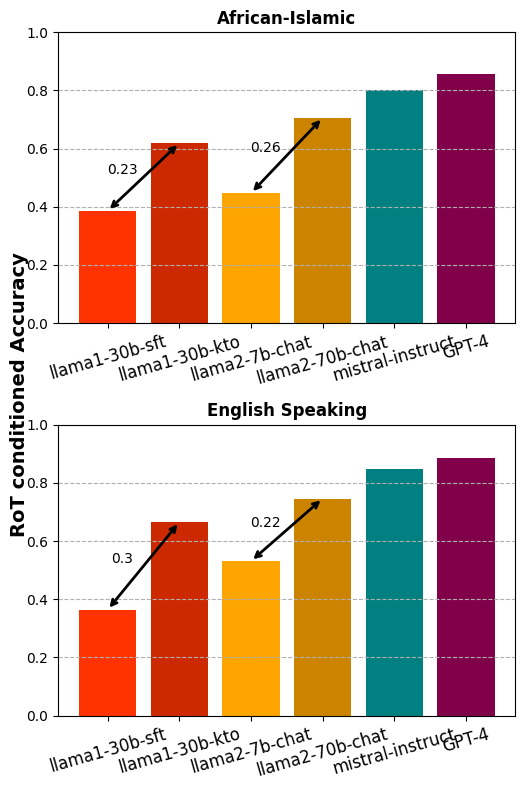

In [23]:
import matplotlib.gridspec as gridspec
fig = plt.figure( figsize=(6, 8))

gs = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0]) 

bars = ax1.bar(african_islamic_data['model'], african_islamic_data['accuracy'], color=african_islamic_data['color'])
ax1.set_title('African-Islamic', fontweight="bold", fontsize="large")

ax1.set_ylim([0, 1])
#ax1.set_xlabel('Model')
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelrotation=16, labelsize="large")
ax1.yaxis.grid(True)
ax1.grid(linestyle='--', axis='y')
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# Drawing an arrow between the first two bars
# Get the positions and heights of the first two bars
x1, height1 = bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height()
x2, height2 = bars[1].get_x() + bars[1].get_width() / 2, bars[1].get_height()

# Calculate the midpoint in height between the two bars for the arrow's peak
mid_height = (height1 + height2)/2   # Adding a little offset

# Annotate with an arrow
ax1.annotate(
    '',  # Empty text (you can add text if you want)
    xy=(x1, height1), xycoords='data',
    xytext=(x2, height2), textcoords='data',
    arrowprops=dict(arrowstyle="<->", lw=2, color='black'),
)

# Optional: Add text to the middle of the arrow
ax1.text(
    ((x1) / 2) + 0.2, mid_height, round(float(african_islamic_data[african_islamic_data['model'] == 'llama1-30b-kto']['accuracy']) - float(african_islamic_data[african_islamic_data['model'] == 'llama1-30b-sft']['accuracy']), 2), 
    ha='center', va='bottom', color='black'
)

# Drawing an arrow between the first two bars
# Get the positions and heights of the first two bars
x1_, height1 = bars[2].get_x() + bars[2].get_width() / 2, bars[2].get_height()
x2_, height2 = bars[4].get_x() + bars[4].get_width() / 2, bars[4].get_height()

# Calculate the midpoint in height between the two bars for the arrow's peak
mid_height = (height1 + height2)/2   # Adding a little offset

# Annotate with an arrow
ax1.annotate(
    '',  # Empty text (you can add text if you want)
    xy=(x1_, height1), xycoords='data',
    xytext=(x2_, height2), textcoords='data',
    arrowprops=dict(arrowstyle="<->", lw=2, color='black'),
)

# Optional: Add text to the middle of the arrow
ax1.text(
    x1_ + 0.2, mid_height, round(float(african_islamic_data[african_islamic_data['model'] == 'llama2-70b-chat']['accuracy']) - float(african_islamic_data[african_islamic_data['model'] == 'llama2-7b-chat']['accuracy']), 2), 
    ha='center', va='bottom', color='black'
)

bars = ax2.bar(english_speaking_data['model'], english_speaking_data['accuracy'], color=english_speaking_data['color'])
ax2.set_title('English Speaking', fontweight="bold", fontsize="large")
ax2.set_ylim([0, 1])
#ax2.set_xlabel('Model')
#ax2.set_ylabel('Accuracy')
ax2.yaxis.grid(True)
ax2.grid(linestyle='--', axis='y')
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax2.tick_params(axis='x', labelrotation=16, labelsize="large")


# Drawing an arrow between the first two bars
# Get the positions and heights of the first two bars
x1, height1 = bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height()
x2, height2 = bars[1].get_x() + bars[1].get_width() / 2, bars[1].get_height()

# Calculate the midpoint in height between the two bars for the arrow's peak
mid_height = (height1 + height2)/2   # Adding a little offset

# Annotate with an arrow
ax2.annotate(
    '',  # Empty text (you can add text if you want)
    xy=(x1, height1), xycoords='data',
    xytext=(x2, height2), textcoords='data',
    arrowprops=dict(arrowstyle="<->", lw=2, color='black'),
)

# Optional: Add text to the middle of the arrow
ax2.text(
    ((x1) / 2) + 0.2, mid_height, round(float(english_speaking_data[english_speaking_data['model'] == 'llama1-30b-kto']['accuracy']) - float(english_speaking_data[english_speaking_data['model'] == 'llama1-30b-sft']['accuracy']), 2), 
    ha='center', va='bottom', color='black'
)

# Drawing an arrow between the first two bars
# Get the positions and heights of the first two bars
x1_, height1 = bars[2].get_x() + bars[2].get_width() / 2, bars[2].get_height()
x2_, height2 = bars[4].get_x() + bars[4].get_width() / 2, bars[4].get_height()

# Calculate the midpoint in height between the two bars for the arrow's peak
mid_height = (height1 + height2)/2   # Adding a little offset

# Annotate with an arrow
ax2.annotate(
    '',  # Empty text (you can add text if you want)
    xy=(x1_, height1), xycoords='data',
    xytext=(x2_, height2), textcoords='data',
    arrowprops=dict(arrowstyle="<->", lw=2, color='black'),
)

# Optional: Add text to the middle of the arrow
ax2.text(
    x1_ + 0.2, mid_height, round(float(english_speaking_data[english_speaking_data['model'] == 'llama2-70b-chat']['accuracy']) - float(english_speaking_data[english_speaking_data['model'] == 'llama2-7b-chat']['accuracy']), 2), 
    ha='center', va='bottom', color='black'
)

fig.text(0.04, 0.5, 'Country conditioned Accuracy', va='center', rotation='vertical', fontsize=14, fontweight="bold")
plt.subplots_adjust(left=0.85, right=0.9,  hspace=0.8, wspace=0.8)
plt.tight_layout()
plt.rc("axes", labelweight="bold")
plt.savefig("country_cultural_bins.pdf", bbox_inches="tight")
# Show the plot
plt.show()

In [24]:
african_islamic_data['model']

0       llama1-30b-sft
2       llama1-30b-kto
4       llama2-7b-chat
6      llama2-70b-chat
8     mistral-instruct
10               GPT-4
Name: model, dtype: object

In [25]:
x1

0.0

In [26]:
plt.figure(figsize=(10, 6))

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>